In [66]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import helpers

%matplotlib inline

In [60]:
# df = pd.read_csv('../data/processed/laps.csv', index_col=["Id", "Intervalle"])
df = pd.read_csv('../data/processed/laps.csv')
df["Id"] = df["Id"].astype(str)
df.set_index(["Id","Intervalle"], inplace=True)
df["avg_hr"] = df["avg_hr"].fillna(value=df["avg_hr"].mean()).astype(int)
df["max_hr"] = df["max_hr"].fillna(value=df["max_hr"].mean()).astype(int)

# Subset by labels for Multi-index df
print(df.loc[("2136561739", "1"),:]["distance"])

3.62


## Taking Summaries out

In [61]:
df.drop(["Summary"], level="Intervalle", inplace=True)

## Droping absurd values

In [63]:
# General Rules
df = df[df["pace"]<10]
df = df[df["time"]>7]

# Manual inspection
# df.drop("1275130625", axis=0, level="Id", inplace=True)

## Time vs Pace

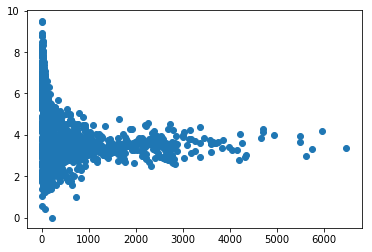

In [67]:
plt.scatter(df["time"], df["pace"])

## Correlation between variables

In [64]:
df.corr()

,distance,time,pace,best_pace,d_plus,d_minus,cadence,stride_length,avg_hr,max_hr,kcal
distance,1.000000,0.988685,-0.168244,-0.015495,0.874579,0.878569,0.095413,-0.110667,-0.061979,0.170041,0.978297
time,0.988685,1.000000,-0.224518,-0.032203,0.874035,0.873469,0.060813,-0.150163,-0.092868,0.151627,0.970283
pace,-0.168244,-0.224518,1.000000,0.340572,-0.190161,-0.180294,0.529687,0.712817,0.137251,-0.012075,-0.208992
best_pace,-0.015495,-0.032203,0.340572,1.000000,-0.044910,-0.040656,0.027508,0.288479,0.031389,0.089529,-0.028564
d_plus,0.874579,0.874035,-0.190161,-0.044910,1.000000,0.929670,0.045863,-0.129849,-0.037596,0.149273,0.870167
d_minus,0.878569,0.873469,-0.180294,-0.040656,0.929670,1.000000,0.054133,-0.122344,-0.044602,0.146934,0.870417
cadence,0.095413,0.060813,0.529687,0.027508,0.045863,0.054133,1.000000,0.186163,0.157524,0.024622,0.054635
stride_length,-0.110667,-0.150163,0.712817,0.288479,-0.129849,-0.122344,0.186163,1.000000,0.080486,-0.007627,-0.136953
avg_hr,-0.061979,-0.092868,0.137251,0.031389,-0.037596,-0.044602,0.157524,0.080486,1.000000,0.833220,0.000670
max_hr,0.170041,0.151627,-0.012075,0.089529,0.149273,0.146934,0.024622,-0.007627,0.833220,1.000000,0.219916


## Minutes in each heartzone

<Container object of 6 artists>

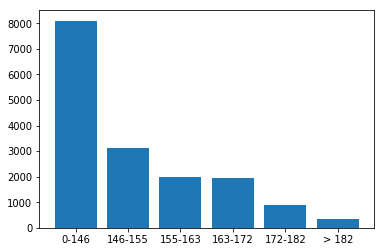

In [68]:
df["zone"] = df.apply(helpers.classify_zone, axis=1)
s= df.groupby("zone")["time"].sum()/60
plt.bar(["0-146","146-155","155-163","163-172","172-182","> 182"], s.tolist())